In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import datetime as datetime
import seaborn as sns
%matplotlib inline

df = pd.read_csv('fulldata.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


### 1. Data Understanding

Data was provided in 2010 and can be downloaded at: https://www.kaggle.com/c/home-data-for-ml-course/overview

In [2]:
DataYear = 2010

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [4]:
categorical_lst = []
numerical_lst = []

In [5]:
# Identifies the type of dwelling involved in the sale.
# Categorical variable
categorical_lst.append('MSSubClass')
df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [6]:
# Identifies the general zoning classification of the sale.
# Categorical variable
categorical_lst.append('MSZoning')
df['MSZoning'].value_counts(1)

RL         0.777015
RM         0.157804
FV         0.047684
RH         0.008919
C (all)    0.008576
Name: MSZoning, dtype: float64

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

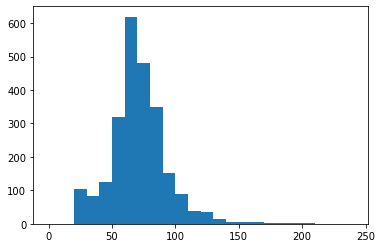

In [7]:
# Linear feet of street connected to property
# Numerical variable
numerical_lst.append('LotFrontage')
plt.hist(df['LotFrontage'], bins=np.arange(0, 250, 10))
df['LotFrontage'].describe()

count      2919.000000
mean      10168.114080
std        7886.996359
min        1300.000000
25%        7478.000000
50%        9453.000000
75%       11570.000000
max      215245.000000
Name: LotArea, dtype: float64

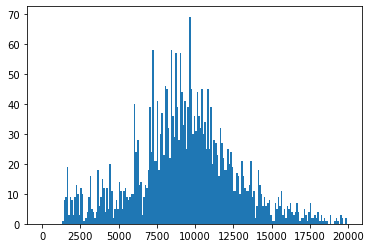

In [8]:
# Lot size in square feet
# Numerical variable
numerical_lst.append('LotArea')
plt.hist(df[df['LotArea'] != 0]['LotArea'], bins=np.arange(0, 20000, 100))
df['LotArea'].describe()

In [9]:
# Type of alley access to property
# Categorical variable
categorical_lst.append('Street')
df['Street'].value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

In [10]:
# General shape of property
# Categorical variable
categorical_lst.append('LotShape')
df['LotShape'].value_counts()

Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64

In [11]:
# Flatness of the property
# Categorical value
categorical_lst.append('LandContour')
df['LandContour'].value_counts()

Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64

In [12]:
# Type of utilities available
# Categorical variable
# Not adding to categorical variable since there is only one row in NoSeWa
df['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [13]:
# Type of LotConfig available
# Categorical variable
df['LotConfig'].value_counts()

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

In [14]:
# Lot configuration
# Categorical variable
categorical_lst.append('LotConfig')
df['LotConfig'].value_counts()

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

In [15]:
# Slope of property
# Categorical variable
categorical_lst.append('LandSlope')
df['LandSlope'].value_counts()

Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

In [16]:
# Physical locations within Ames city limits
# Categorical variable
categorical_lst.append('Neighborhood')
df['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

In [17]:
# Proximity to various conditions
# Categorical variable
categorical_lst.append('Condition1')
df['Condition1'].value_counts()

Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

In [18]:
# Proximity to various conditions (if more than one is present)
# Categorical variable
categorical_lst.append('Condition2')
df['Condition2'].value_counts()

Norm      2889
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

In [19]:
# Type of dwelling
# Categorical variable
categorical_lst.append('BldgType')
df['BldgType'].value_counts()

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

In [20]:
# Type of HouseStyle
# Categorical value
categorical_lst.append('HouseStyle')
df['HouseStyle'].value_counts()

1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64

In [21]:
# Type of OverallQual
# Categorical value
categorical_lst.append('OverallQual')
df['OverallQual'].value_counts()

5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: OverallQual, dtype: int64

In [22]:
# Type of OverallCond
# Categorical value
categorical_lst.append('OverallCond')
df['OverallCond'].value_counts()

5    1645
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64

In [23]:
# Will use age instead of year since that will make more
df['YearBuilt']

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
2914    1970
2915    1970
2916    1960
2917    1992
2918    1993
Name: YearBuilt, Length: 2919, dtype: int64

count    2919.000000
mean       38.687222
std        30.291442
min         0.000000
25%         9.000000
50%        37.000000
75%        56.500000
max       138.000000
Name: HouseAge, dtype: float64

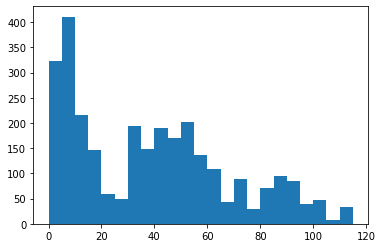

In [24]:
# Type of Age
# Numerical value
from datetime import datetime
import numpy as np

df['HouseAge'] = DataYear - df['YearBuilt']
numerical_lst.append('HouseAge')
plt.hist(df['HouseAge'], bins=np.arange(0, 120, 5))
df['HouseAge'].describe()

In [25]:
# Same as above
df['YearRemodAdd']

0       2003
1       1976
2       2002
3       1970
4       2000
        ... 
2914    1970
2915    1970
2916    1996
2917    1992
2918    1994
Name: YearRemodAdd, Length: 2919, dtype: int64

count    2919.000000
mean       25.735526
std        20.894344
min         0.000000
25%         6.000000
50%        17.000000
75%        45.000000
max        60.000000
Name: RemodAge, dtype: float64

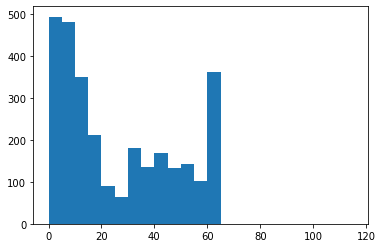

In [26]:
# Type of RemodAge
# Numerical value
df['RemodAge'] = DataYear - df['YearRemodAdd']
numerical_lst.append('RemodAge')
plt.hist(df['RemodAge'], bins=np.arange(0, 120, 5))
df['RemodAge'].describe()

In [27]:
# Type of RoofStyle
# Categorical value
categorical_lst.append('RoofStyle')
df['RoofStyle'].value_counts()

Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64

In [28]:
# Type of RoofMatl
# Categorical value
categorical_lst.append('RoofMatl')
df['RoofMatl'].value_counts()

CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [29]:
# Type of Exterior1st
# Categorical value
categorical_lst.append('Exterior1st')
df['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
CBlock        2
AsphShn       2
Stone         2
ImStucc       1
Name: Exterior1st, dtype: int64

In [30]:
# Type of Exterior1st
# Categorical value
categorical_lst.append('Exterior2nd')
df['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [31]:
# Type of Exterior1st
# Categorical value
categorical_lst.append('MasVnrType')
df['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

count    2896.000000
mean      102.201312
std       179.334253
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

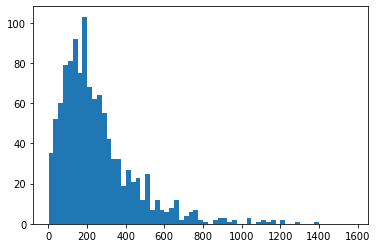

In [32]:
# Type of MasVnrArea
# Numerical value
numerical_lst.append('MasVnrArea')
plt.hist(df['MasVnrArea'], bins=np.arange(1, 1600, 25))
df['MasVnrArea'].describe()

In [33]:
# Type of ExterQual
# Categorical value
categorical_lst.append('ExterQual')
df['ExterQual'].value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

In [34]:
# Type of ExterCond
# Categorical value
categorical_lst.append('ExterCond')
df['ExterCond'].value_counts()

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

In [35]:
# Type of ExterQual
# Categorical value
categorical_lst.append('Foundation')
df['Foundation'].value_counts()

PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64

In [36]:
# Type of Basement Height
# Categorical value
categorical_lst.append('BsmtQual')
df['BsmtQual'].value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [37]:
# Type of Basement Condition
# Categorical value
categorical_lst.append('BsmtCond')
df['BsmtCond'].value_counts()

TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [38]:
# Type of Basement Exposure
# Categorical value
categorical_lst.append('BsmtExposure')
df['BsmtExposure'].value_counts()

No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

In [39]:
# Type of Basement Finished Area
# Categorical value
categorical_lst.append('BsmtFinType1')
df['BsmtFinType1'].value_counts()

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64

count    2918.000000
mean      441.423235
std       455.610826
min         0.000000
25%         0.000000
50%       368.500000
75%       733.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

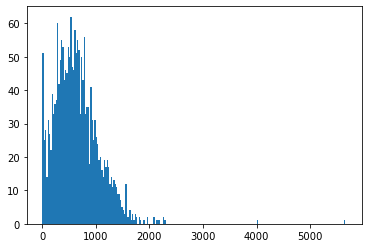

In [40]:
# Type of Basement Finished square feet
# Categorical value
numerical_lst.append('BsmtFinSF1')
plt.hist(df['BsmtFinSF1'], bins=np.arange(1, 5700, 25))
df['BsmtFinSF1'].describe()

In [41]:
# Type of Basement Finished Area
# Categorical value
categorical_lst.append('BsmtFinType2')
df['BsmtFinType2'].value_counts()

Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

count    2918.000000
mean       49.582248
std       169.205611
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64

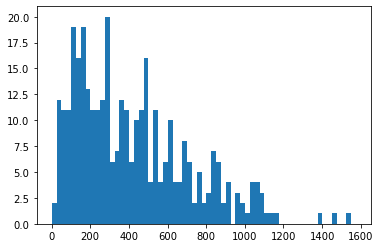

In [42]:
# Type of Basement Finished square feet
# Numerical value
numerical_lst.append('BsmtFinSF2')
# Histogram dropping rows without basement
plt.hist(df['BsmtFinSF2'], bins=np.arange(1, 1600, 25))
df['BsmtFinSF2'].describe()

count    2918.000000
mean      560.772104
std       439.543659
min         0.000000
25%       220.000000
50%       467.000000
75%       805.500000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

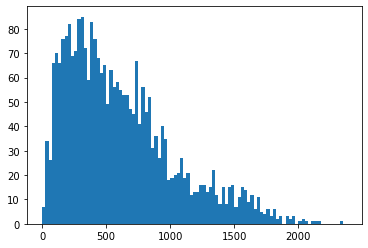

In [43]:
# Type of Basement Unfinished Area
# Numerical value
numerical_lst.append('BsmtUnfSF')
# Histogram dropping rows without basement
plt.hist(df[df['BsmtUnfSF'] != 0]['BsmtUnfSF'], bins=np.arange(0, 2400, 25))
df['BsmtUnfSF'].describe()

count    2918.000000
mean     1051.777587
std       440.766258
min         0.000000
25%       793.000000
50%       989.500000
75%      1302.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

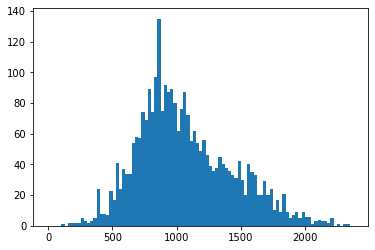

In [44]:
# Type of Basement Unfinished Area
# Numerical value
numerical_lst.append('TotalBsmtSF')
# Histogram dropping rows without basement
plt.hist(df['TotalBsmtSF'], bins=np.arange(1, 2400, 25))
df['TotalBsmtSF'].describe()

In [45]:
# Type of Heating
# Categorical value
categorical_lst.append('Heating')
df['Heating'].value_counts()

GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

In [46]:
# Quality of Heating
# Categorical value
categorical_lst.append('HeatingQC')
df['HeatingQC'].value_counts()

Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64

In [47]:
# Central air conditioning 
# Categorical value
categorical_lst.append('CentralAir')
df['CentralAir'].value_counts()

Y    2723
N     196
Name: CentralAir, dtype: int64

In [48]:
# Central air conditioning 
# Categorical value
categorical_lst.append('Electrical')
df['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

count    2919.000000
mean     1159.581706
std       392.362079
min       334.000000
25%       876.000000
50%      1082.000000
75%      1387.500000
max      5095.000000
Name: 1stFlrSF, dtype: float64

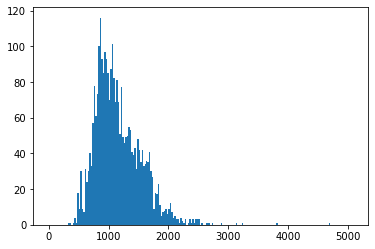

In [49]:
# 1st Floor Square feet
# Numerical value
numerical_lst.append('1stFlrSF')
# Histogram dropping rows without basement
plt.hist(df['1stFlrSF'], bins=np.arange(0, 5100, 25))
df['1stFlrSF'].describe()

count    2919.000000
mean      336.483727
std       428.701456
min         0.000000
25%         0.000000
50%         0.000000
75%       704.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

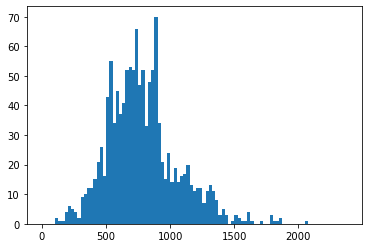

In [50]:
# 2st Floor Square feet
# Numerical value
numerical_lst.append('2ndFlrSF')
# Histogram dropping rows without basement
plt.hist(df['2ndFlrSF'], bins=np.arange(1, 2400, 25))
df['2ndFlrSF'].describe()

count    2919.000000
mean        4.694416
std        46.396825
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1064.000000
Name: LowQualFinSF, dtype: float64

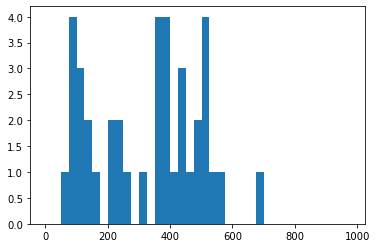

In [51]:
# Low quality finished square feet (all floors)
# Numerical Value
numerical_lst.append('LowQualFinSF')
plt.hist(df['LowQualFinSF'], bins=np.arange(1, 1000, 25))
df['LowQualFinSF'].describe()

count    2919.000000
mean     1500.759849
std       506.051045
min       334.000000
25%      1126.000000
50%      1444.000000
75%      1743.500000
max      5642.000000
Name: GrLivArea, dtype: float64

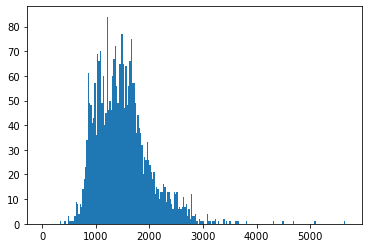

In [52]:
# Above grade (ground) living area square feet
# Numerical Value
numerical_lst.append('GrLivArea')
plt.hist(df['GrLivArea'], bins=np.arange(0, 5700, 25))
df['GrLivArea'].describe()

In [53]:
# # of Basements full bath
# Numerical Value
numerical_lst.append('BsmtFullBath')
df['BsmtFullBath'].value_counts()

0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

In [54]:
# # of Basements half bath
# Numerical Value
numerical_lst.append('BsmtHalfBath')
df['BsmtHalfBath'].value_counts()

0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

In [55]:
# # of Full Bath
# Numerical Value
numerical_lst.append('FullBath')
df['FullBath'].value_counts()

2    1530
1    1309
3      64
0      12
4       4
Name: FullBath, dtype: int64

In [56]:
# Number of Half Bath
# Numerical Value
numerical_lst.append('HalfBath')
df['HalfBath'].value_counts()

0    1834
1    1060
2      25
Name: HalfBath, dtype: int64

In [57]:
# Number of Bedrooms Above Ground
# Numerical Value
numerical_lst.append('BedroomAbvGr')
df['BedroomAbvGr'].value_counts()

3    1596
2     742
4     400
1     103
5      48
6      21
0       8
8       1
Name: BedroomAbvGr, dtype: int64

In [58]:
# Number of Kitchens Above Ground
# Numerical Value
numerical_lst.append('KitchenAbvGr')
df['KitchenAbvGr'].value_counts()

1    2785
2     129
0       3
3       2
Name: KitchenAbvGr, dtype: int64

In [59]:
# Kitchen Quality
# Categorical value
categorical_lst.append('KitchenQual')
df['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [60]:
# Number of Kitchens Above Ground
# Numerical Value
numerical_lst.append('TotRmsAbvGrd')
df['TotRmsAbvGrd'].value_counts()

6     844
7     649
5     583
8     347
4     196
9     143
10     80
11     32
3      25
12     16
2       1
14      1
13      1
15      1
Name: TotRmsAbvGrd, dtype: int64

In [61]:
# Home functionality (Assume typical unless deductions are warranted)
# Categorical value
categorical_lst.append('Functional')
df['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [62]:
# Number of Fireplaces
# Numerical Value
numerical_lst.append('Fireplaces')
df['Fireplaces'].value_counts()

0    1420
1    1268
2     219
3      11
4       1
Name: Fireplaces, dtype: int64

In [63]:
# Fireplace quality
# Categorical value
categorical_lst.append('FireplaceQu')
df['FireplaceQu'].value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [64]:
# Garage Type
# Categorical value
categorical_lst.append('GarageType')
df['GarageType'].value_counts()

Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

count    2760.000000
mean       31.886594
std        25.574285
min      -197.000000
25%         8.000000
50%        31.000000
75%        50.000000
max       115.000000
Name: GarageAge, dtype: float64

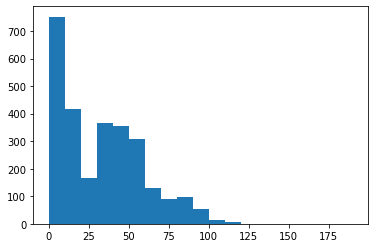

In [65]:
# Garage Age
# Numerical value
df['GarageAge'] = DataYear - df['GarageYrBlt']
numerical_lst.append('GarageType')
plt.hist(df['GarageAge'], bins=np.arange(0, 200, 10))
df['GarageAge'].describe()

In [66]:
# Garage Fininsh Type
# Categorical Value
categorical_lst.append('GarageFinish')
df['GarageFinish'].value_counts()

Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64

count    2918.000000
mean        1.766621
std         0.761624
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

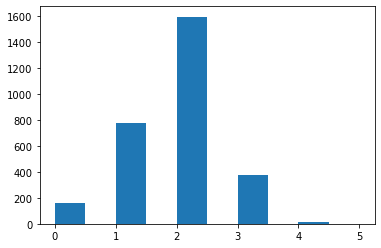

In [67]:
# Size of garage in car capacity
# Numerical Value
plt.hist(df['GarageCars'])
numerical_lst.append('GarageCars')
df['GarageCars'].describe()

count    2918.000000
mean      472.874572
std       215.394815
min         0.000000
25%       320.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

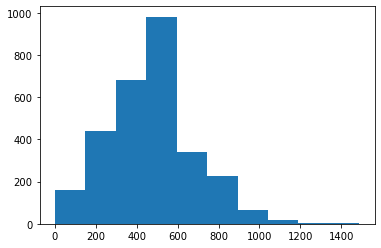

In [68]:
# Garage Area
# Numerical Value
numerical_lst.append('GarageArea')
plt.hist(df['GarageArea'])
df['GarageArea'].describe()

In [69]:
# Garage Quality
# Categorical Value
categorical_lst.append('GarageQual')
df['GarageQual'].value_counts()

TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

In [70]:
# Garage Condition
# Categorical Value
categorical_lst.append('GarageCond')
df['GarageCond'].value_counts()

TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

In [71]:
# Paved driveway
# Categorical Value
categorical_lst.append('PavedDrive')
df['PavedDrive'].value_counts()

Y    2641
N     216
P      62
Name: PavedDrive, dtype: int64

count    2919.000000
mean       93.709832
std       126.526589
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max      1424.000000
Name: WoodDeckSF, dtype: float64

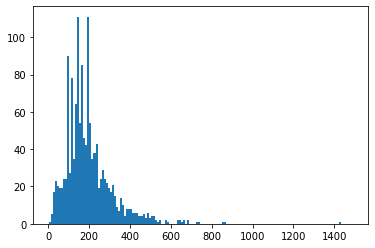

In [72]:
# Wood deck area in square feet
# Numerical Value
numerical_lst.append('WoodDeckSF')
plt.hist(df['WoodDeckSF'], bins=np.arange(1, 1500, 10))
df['WoodDeckSF'].describe()

count    2919.000000
mean       47.486811
std        67.575493
min         0.000000
25%         0.000000
50%        26.000000
75%        70.000000
max       742.000000
Name: OpenPorchSF, dtype: float64

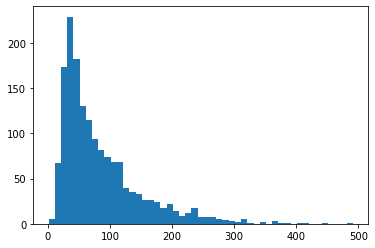

In [73]:
# Open porch area in square feet
# Numerical Value
numerical_lst.append('WoodDeckSF')
plt.hist(df['OpenPorchSF'], bins=np.arange(1, 500, 10))
df['OpenPorchSF'].describe()

count    2919.000000
mean       23.098321
std        64.244246
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1012.000000
Name: EnclosedPorch, dtype: float64

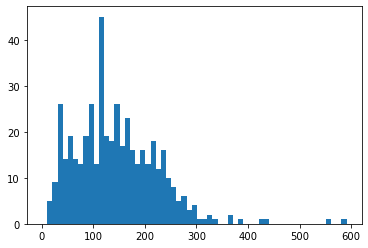

In [74]:
# Enclosed porch area in square feet
# Numerical Value
numerical_lst.append('EnclosedPorch')
plt.hist(df['EnclosedPorch'], bins=np.arange(1, 600, 10))
df['EnclosedPorch'].describe()

count    2919.000000
mean        2.602261
std        25.188169
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64

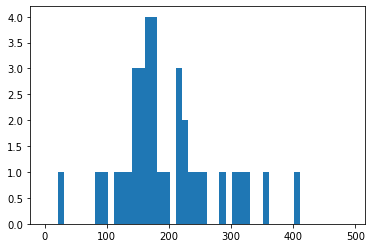

In [75]:
# Three season porch area in square feet
# Numerical Value
numerical_lst.append('3SsnPorch')
plt.hist(df['3SsnPorch'], bins=np.arange(1, 500, 10))
df['3SsnPorch'].describe()

count    2919.000000
mean       16.062350
std        56.184365
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       576.000000
Name: ScreenPorch, dtype: float64

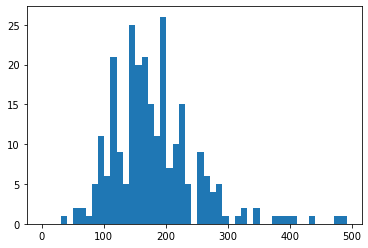

In [76]:
# Screen porch area in square feet
# Numerical Value
numerical_lst.append('ScreenPorch')
plt.hist(df['ScreenPorch'], bins=np.arange(1, 500, 10))
df['ScreenPorch'].describe()

count    2919.000000
mean        2.251799
std        35.663946
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: PoolArea, dtype: float64

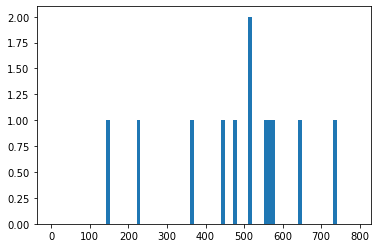

In [77]:
# Pool area in square feet
# Numerical Value
# Not adding pool area 
plt.hist(df['PoolArea'], bins=np.arange(1, 800, 10))
df['PoolArea'].describe()

In [78]:
# Paved driveway
# Categorical Value
df['PoolQC'].value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

In [79]:
# Fence quality
# Categorical Value
categorical_lst.append('Fence')
df['Fence'].value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [80]:
# Miscellaneous feature not covered in other categories
# Categorical Value
categorical_lst.append('MiscFeature')
df['MiscFeature'].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

count     2919.000000
mean        50.825968
std        567.402211
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      17000.000000
Name: MiscVal, dtype: float64

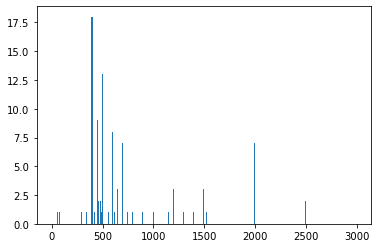

In [81]:
# Value of miscellaneous feature
# Numerical Value
plt.hist(df['MiscVal'], bins=np.arange(1, 3000, 10))
df['MiscVal'].describe()

In [82]:
# Month Sold (MM)
# Categorical Value
categorical_lst.append('MoSold')
df['MoSold'].value_counts()

6     503
7     446
5     394
4     279
8     233
3     232
10    173
9     158
11    142
2     133
1     122
12    104
Name: MoSold, dtype: int64

In [83]:
# Year Sold
# Categorical Value
categorical_lst.append('YrSold')
df['YrSold'].value_counts()

2007    692
2009    647
2008    622
2006    619
2010    339
Name: YrSold, dtype: int64

In [84]:
# Type of sale
# Categorical Value
categorical_lst.append('SaleType')
df['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [85]:
# Condition of sale
# Categorical Value
categorical_lst.append('SaleCondition')
df['SaleCondition'].value_counts()

Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64

In [86]:
# House Age
df['HouseAge']

0        7
1       34
2        9
3       95
4       10
        ..
2914    40
2915    40
2916    50
2917    18
2918    17
Name: HouseAge, Length: 2919, dtype: int64

count    2919.000000
mean       25.735526
std        20.894344
min         0.000000
25%         6.000000
50%        17.000000
75%        45.000000
max        60.000000
Name: RemodAge, dtype: float64

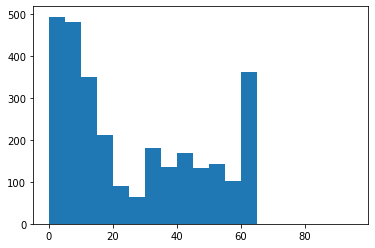

In [87]:
plt.hist(df['RemodAge'], bins=np.arange(0, 100, 5))
df['RemodAge'].describe()

count    2760.000000
mean       31.886594
std        25.574285
min      -197.000000
25%         8.000000
50%        31.000000
75%        50.000000
max       115.000000
Name: GarageAge, dtype: float64

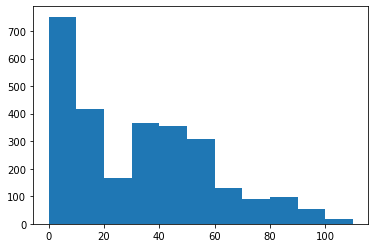

In [88]:
plt.hist(df['GarageAge'], bins=np.arange(0, 120, 10))
df['GarageAge'].describe()

<AxesSubplot:>

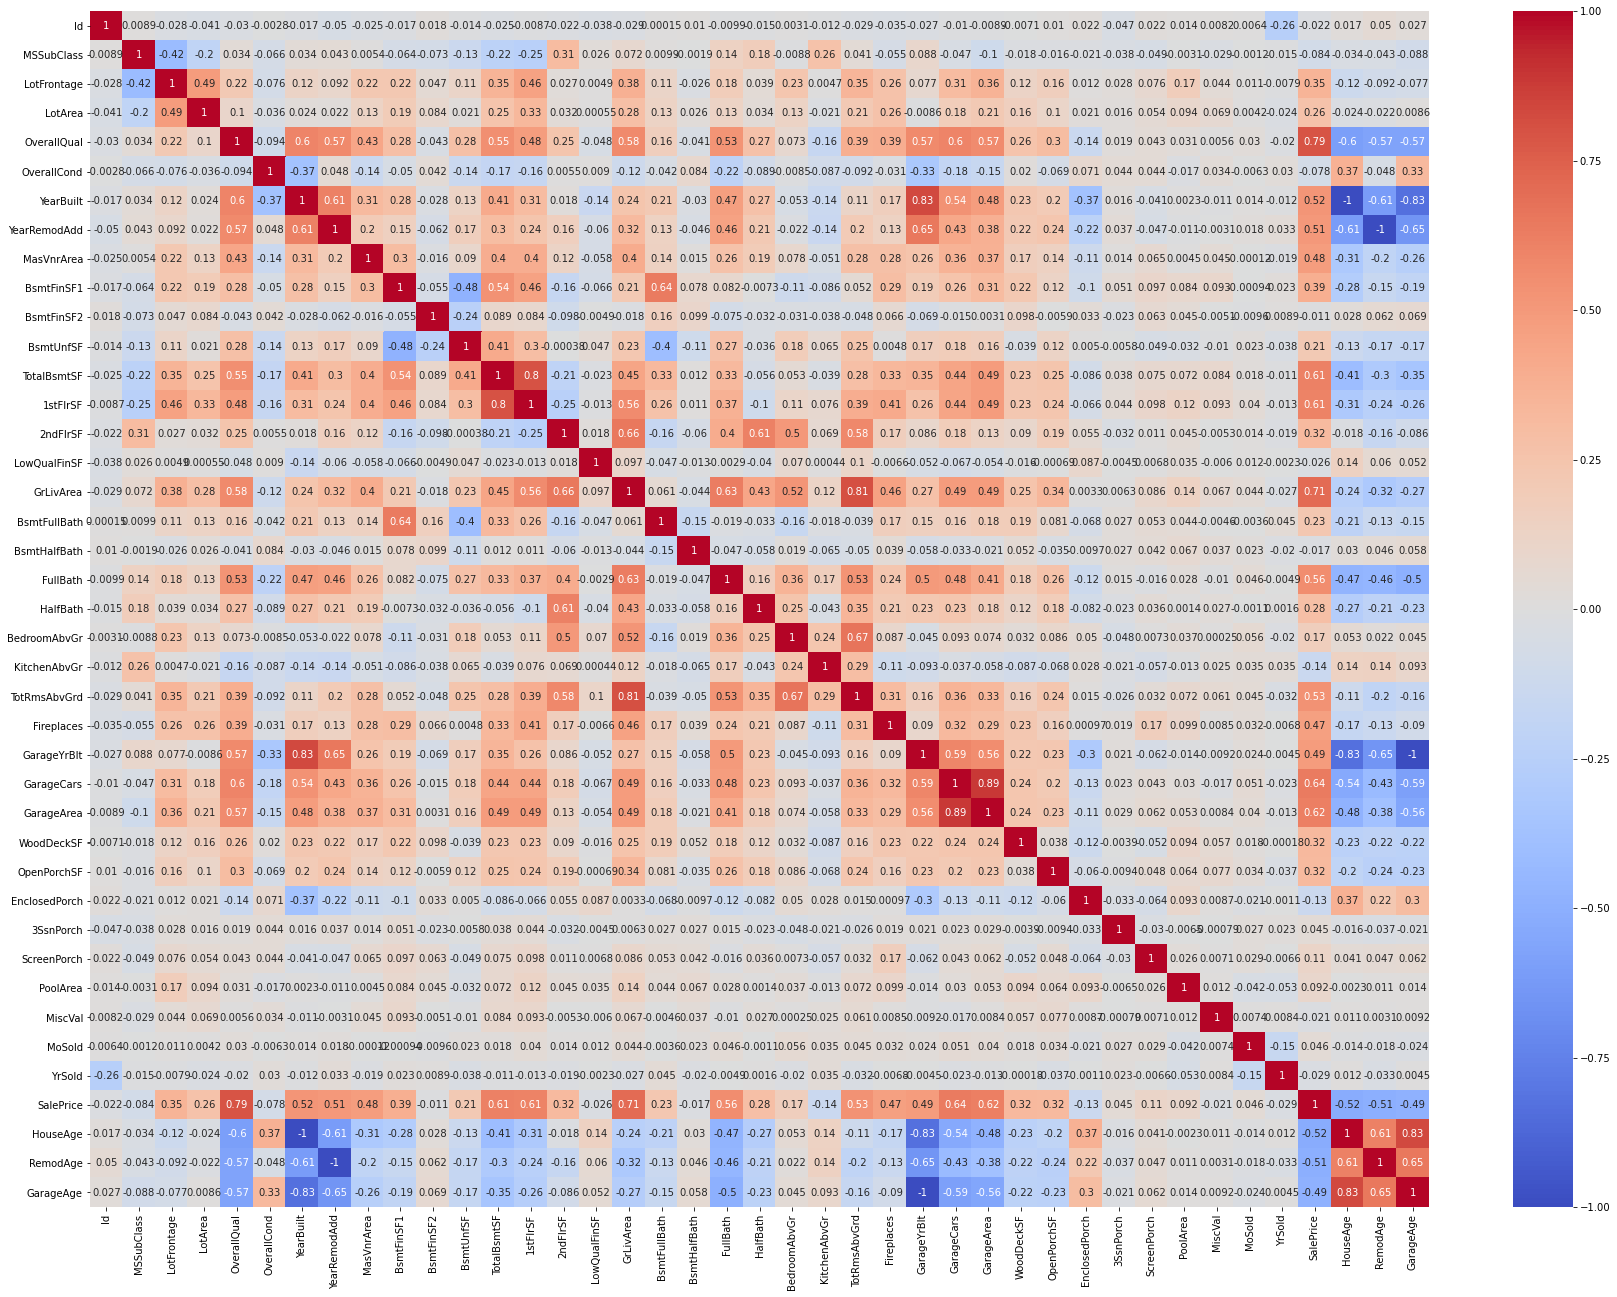

In [89]:
plt.figure(figsize=(30,22))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 84 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

### 2. Business Understanding
1. What are the main issues I should consider when renovating a used apartment in order to make it more valuable according to the data (e.g.: adding a new room, bathroom, etc..)?
2. Does the month when the sale occurs have an effect on the sale price?
3. How well can we predict apartment prices based on the features available?

### 3. Data Preparation

In [91]:
df.iloc[df[df['GarageAge'] < 0].index, 59]

2592    2207.0
Name: GarageYrBlt, dtype: float64

In [92]:
# First filling out messed up value
df.iloc[df[df['GarageAge'] < 0].index, 59] = 2007

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 84 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [94]:
num_vars = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
            'TotRmsAbvGrd', 'HouseAge', 'RemodAge', 'SalePrice', 'GarageAge', 'Fireplaces']

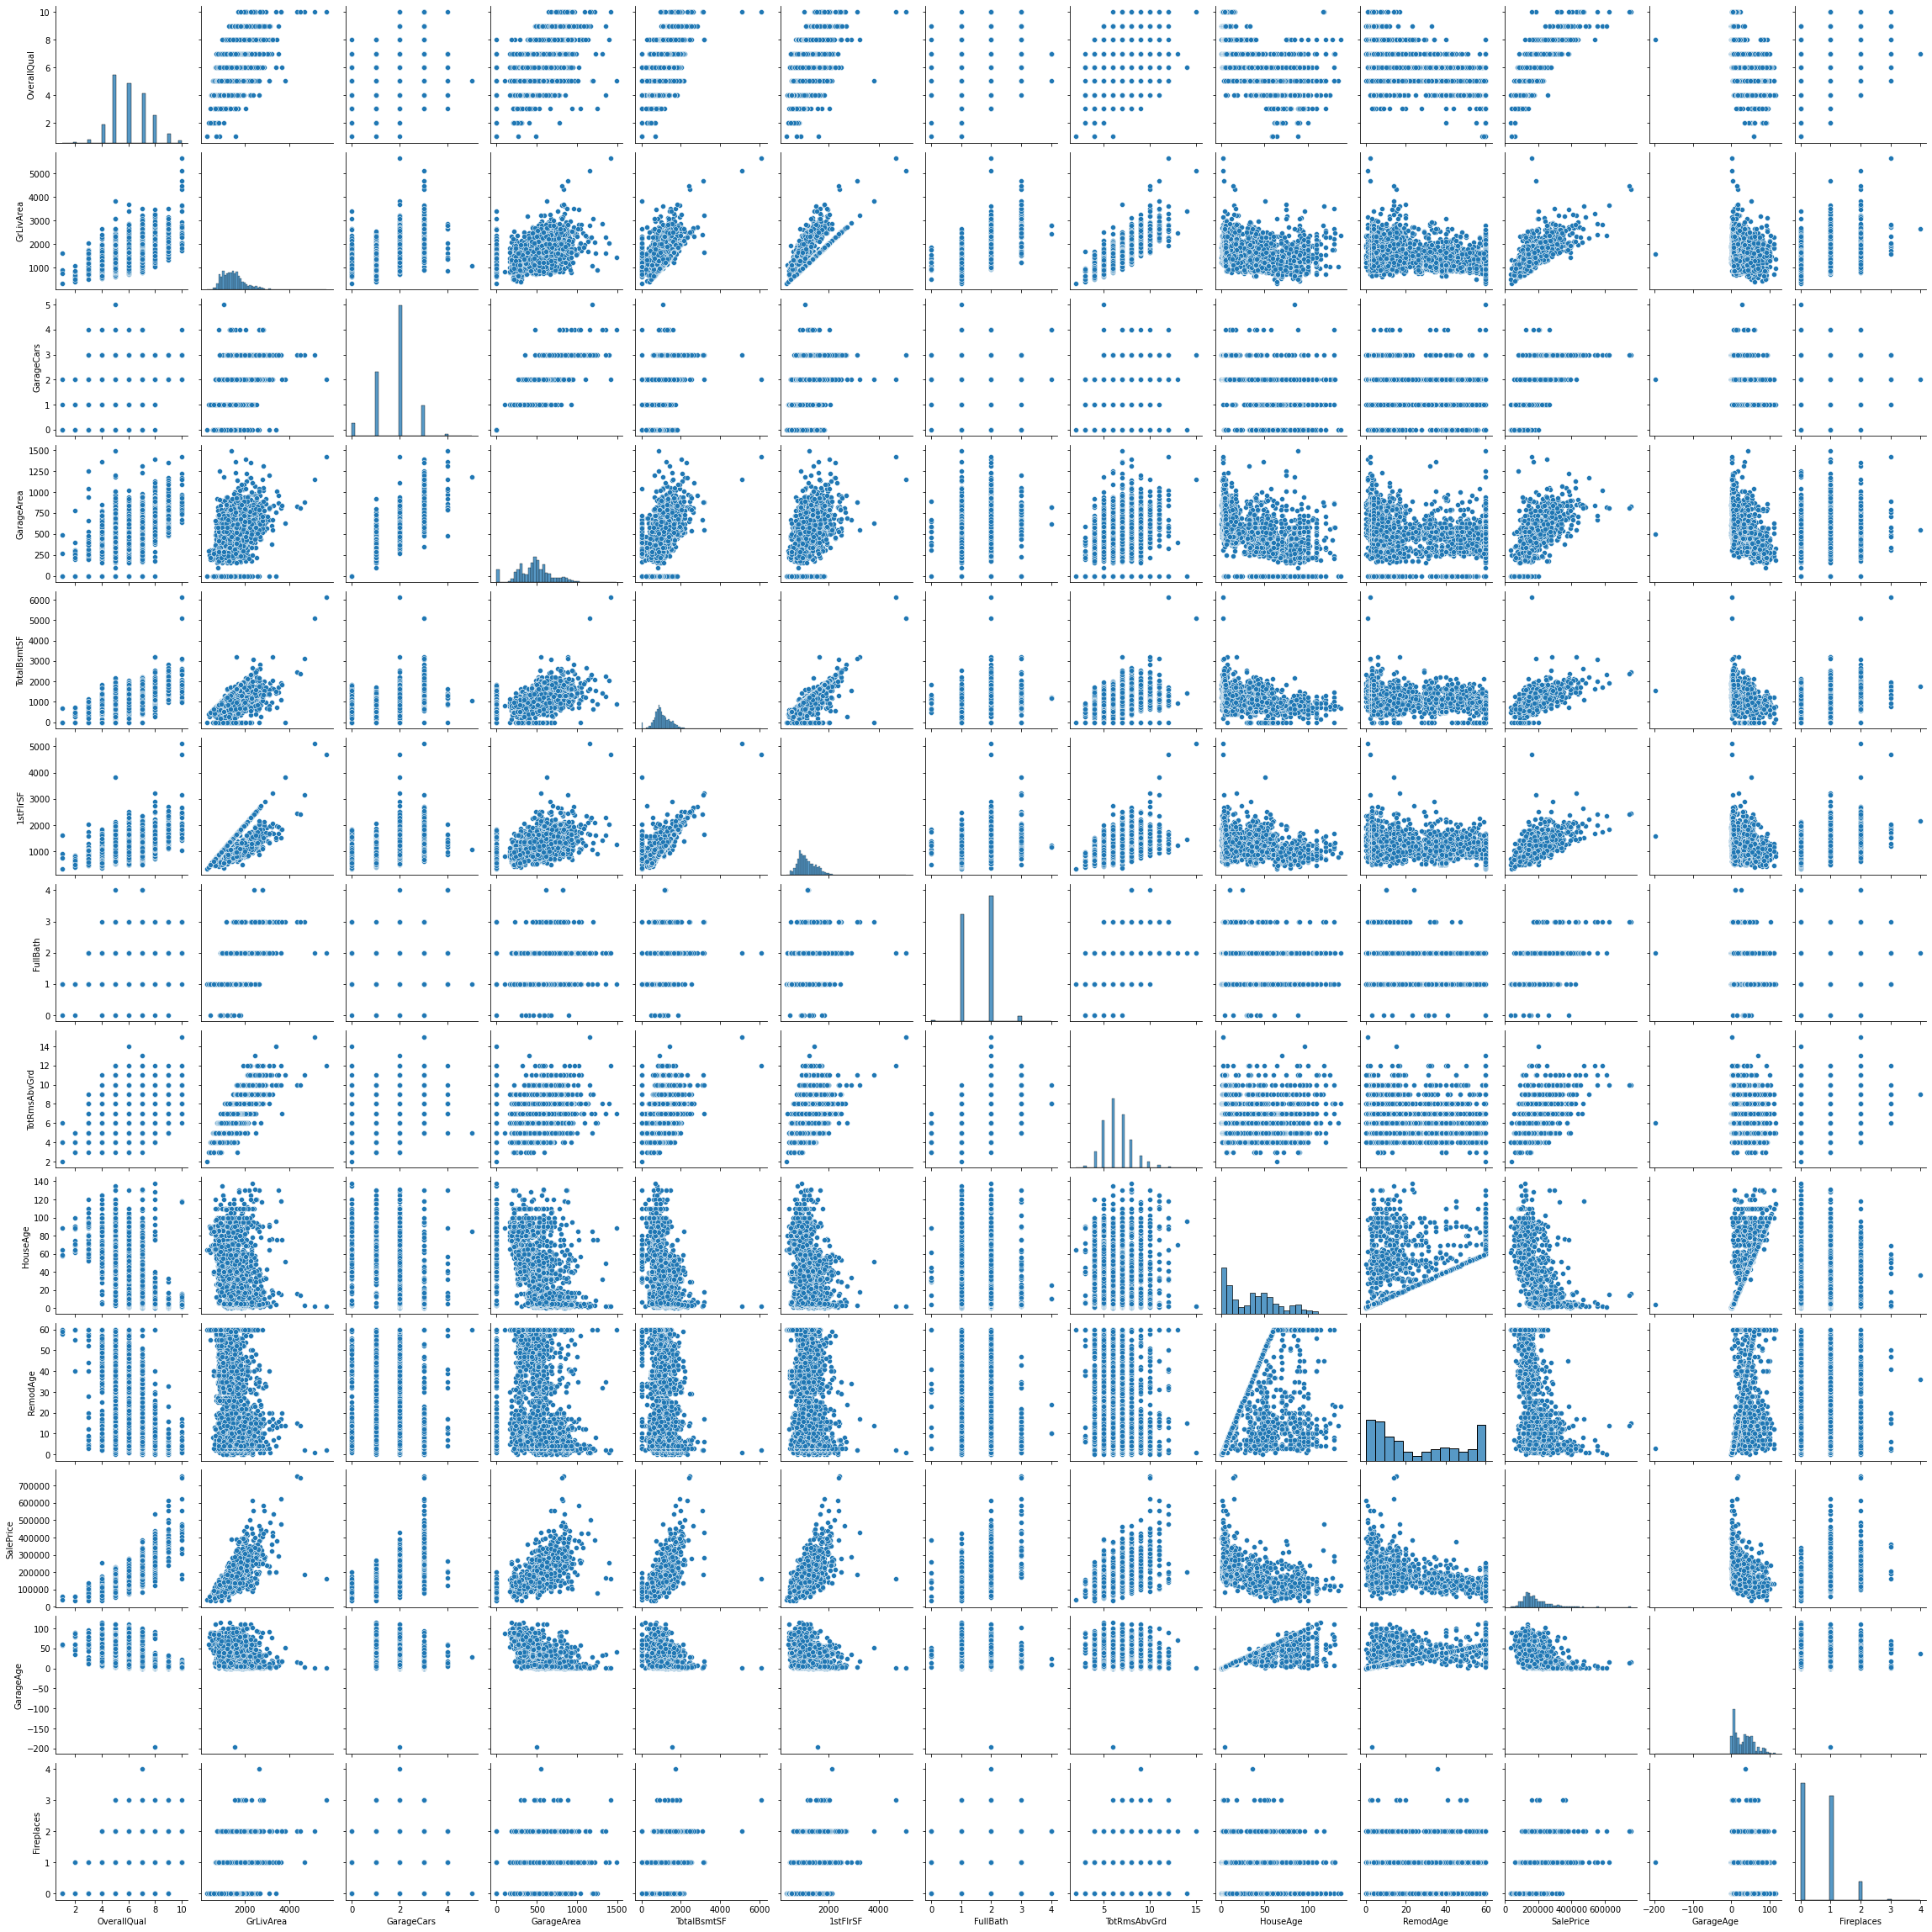

In [95]:
sns.pairplot(df[num_vars])

In [96]:
df[categorical_lst].head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,RFn,TA,TA,Y,NaN,NaN,2,2008,WD,Normal
1,20,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,RFn,TA,TA,Y,NaN,NaN,5,2007,WD,Normal
2,60,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,RFn,TA,TA,Y,NaN,NaN,9,2008,WD,Normal
3,70,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,Unf,TA,TA,Y,NaN,NaN,2,2006,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,RFn,TA,TA,Y,NaN,NaN,12,2008,WD,Normal


In [97]:
df[categorical_lst].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     2919 non-null   int64 
 1   MSZoning       2915 non-null   object
 2   Street         2919 non-null   object
 3   LotShape       2919 non-null   object
 4   LandContour    2919 non-null   object
 5   LotConfig      2919 non-null   object
 6   LandSlope      2919 non-null   object
 7   Neighborhood   2919 non-null   object
 8   Condition1     2919 non-null   object
 9   Condition2     2919 non-null   object
 10  BldgType       2919 non-null   object
 11  HouseStyle     2919 non-null   object
 12  OverallQual    2919 non-null   int64 
 13  OverallCond    2919 non-null   int64 
 14  RoofStyle      2919 non-null   object
 15  RoofMatl       2919 non-null   object
 16  Exterior1st    2918 non-null   object
 17  Exterior2nd    2918 non-null   object
 18  MasVnrType     2895 non-null

In [98]:
df['MSSubClass'].value_counts(1)

20     0.369647
60     0.196985
50     0.098321
120    0.062350
30     0.047619
70     0.043851
160    0.043851
80     0.040425
90     0.037342
190    0.020898
85     0.016444
75     0.007879
45     0.006166
180    0.005824
40     0.002055
150    0.000343
Name: MSSubClass, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

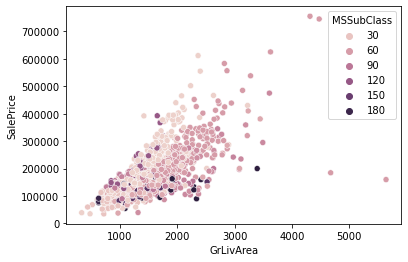

In [99]:
sns.scatterplot(df['GrLivArea'], df['SalePrice'], hue=df['MSSubClass'])

In [100]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [101]:
# Did not use MSSubClass since it dit not improve the R**2
#df_selected = create_dummy_df(df[num_vars + MSSubClass], MSSubClass, False)

In [102]:
# Did not use MSSubClass since it dit not improve the R**2
#df_selected = create_dummy_df(df[num_vars + ['SaleCondition']], ['SaleCondition'], False)

In [103]:
# Did not use MSSubClass since it dit not improve the R**2
#df_selected = create_dummy_df(df[num_vars + ['Neighborhood']], ['Neighborhood'], False)
#df_selected

In [104]:
#df_selected = create_dummy_df(df[num_vars + cat_vars], cat_vars, False)
df_selected = df[num_vars]

In [105]:
# Dropping rows with NaN
df_selected = df_selected.dropna()
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1379 non-null   int64  
 1   GrLivArea     1379 non-null   int64  
 2   GarageCars    1379 non-null   float64
 3   GarageArea    1379 non-null   float64
 4   TotalBsmtSF   1379 non-null   float64
 5   1stFlrSF      1379 non-null   int64  
 6   FullBath      1379 non-null   int64  
 7   TotRmsAbvGrd  1379 non-null   int64  
 8   HouseAge      1379 non-null   int64  
 9   RemodAge      1379 non-null   int64  
 10  SalePrice     1379 non-null   float64
 11  GarageAge     1379 non-null   float64
 12  Fireplaces    1379 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 150.8 KB


In [106]:
df_selected.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'HouseAge', 'RemodAge',
       'SalePrice', 'GarageAge', 'Fireplaces'],
      dtype='object')

### 4. Modeling

In [107]:
df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','SaleType','SaleCondition','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','BsmtFinType1','BsmtFinType2','LotFrontage','MasVnrArea','GarageCars','Functional','KitchenQual','BsmtFullBath','BsmtHalfBath','BsmtFinType1','BsmtFinSF2','BsmtUnfSF','Electrical','Heating','HeatingQC','CentralAir','PavedDrive'],axis=1)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HouseAge,RemodAge,GarageAge
0,1,60,8450,7,5,2003,2003,706.0,856.0,856,...,0,0,0,0,2,2008,208500.0,7,7,7.0
1,2,20,9600,6,8,1976,1976,978.0,1262.0,1262,...,0,0,0,0,5,2007,181500.0,34,34,34.0
2,3,60,11250,7,5,2001,2002,486.0,920.0,920,...,0,0,0,0,9,2008,223500.0,9,8,9.0
3,4,70,9550,7,5,1915,1970,216.0,756.0,961,...,0,0,0,0,2,2006,140000.0,95,40,12.0
4,5,60,14260,8,5,2000,2000,655.0,1145.0,1145,...,0,0,0,0,12,2008,250000.0,10,10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,1936,4,7,1970,1970,0.0,546.0,546,...,0,0,0,0,6,2006,NaN,40,40,NaN
2915,2916,160,1894,4,5,1970,1970,252.0,546.0,546,...,0,0,0,0,4,2006,NaN,40,40,40.0
2916,2917,20,20000,5,7,1960,1996,1224.0,1224.0,1224,...,0,0,0,0,9,2006,NaN,50,14,50.0
2917,2918,85,10441,5,5,1992,1992,337.0,912.0,970,...,0,0,0,700,7,2006,NaN,18,18,NaN


In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X = df_selected.drop(['SalePrice'], axis=1)
y = df_selected['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

x_train = sm.add_constant(X_train)

model = sm.OLS(y_train, x_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     275.3
Date:                Sun, 02 Jan 2022   Prob (F-statistic):          1.68e-299
Time:                        12:47:48   Log-Likelihood:                -11536.
No. Observations:                 965   AIC:                         2.310e+04
Df Residuals:                     952   BIC:                         2.316e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.979e+04   1.06e+04     -6.589      0.000   -9.06e+04    -4.9e+04
OverallQual   2.006e+04   1516.000     13.234      0.000    1.71e+04     2.3e+04
GrLivArea       49.0097      5.423      9.038      0.000      38.368      59.652
GarageCars    1.533e+04   3821.796      4.011      0.000    7828.787    2.28e+04
GarageArea      18.8988     13.170      1.435      0.152      -6.948      44.745
TotalBsmtSF     21.1578      5.386      3.929      0.000      10.589      31.727
1stFlrSF         8.6239      6.244      1.381      0.168      -3.630      20.878
FullBath     -4474.8389   3397.809     -1.317      0.188   -1.11e+04    2193.223
TotRmsAbvGrd    93.8450   1409.244      0.067      0.947   -2671.739    2859.429
HouseAge      -282.6815     83.725     -3.376      0.001    -446.989    -118.374
RemodAge      -338.2350     85.019     -3.978      0.000    -505.081    -171.389
GarageAge      147.9501    106.333      1.391      0.164     -60.725     356.625
Fireplaces    8566.2436   2250.142      3.807      0.000    4150.433     1.3e+04
==============================================================================
Omnibus:                      372.028   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60202.032
Skew:                          -0.614   Prob(JB):                         0.00
Kurtosis:                      41.675   Cond. No.                     2.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

### 5. Evaluating

#### 1. What are the main issues I should consider when renovating a used apartment in order to make it more valuable according to the data (e.g.: adding a new room, bathroom, etc..)?

In [110]:
# The coefficients
print("Coefficients: \n", lr.coef_)

Coefficients: 
 [ 2.00629563e+04  4.90097305e+01  1.53289057e+04  1.88987648e+01
  2.11578024e+01  8.62394698e+00 -4.47483893e+03  9.38450182e+01
 -2.82681500e+02 -3.38234983e+02  1.47950099e+02  8.56624356e+03]


In [111]:
coef_dic = {x[0] : abs(x[1]) for x in zip(X.columns, lr.coef_)}
coef_dic = {k: v for k, v in sorted(coef_dic.items(), reverse=True, key=lambda item: item[1])}
coef_df = pd.DataFrame(coef_dic, index=[1])
coef_df

,OverallQual,GarageCars,Fireplaces,FullBath,RemodAge,HouseAge,GarageAge,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,GarageArea,1stFlrSF
1,20062.956274,15328.905735,8566.243561,4474.838933,338.234983,282.6815,147.950099,93.845018,49.009731,21.157802,18.898765,8.623947


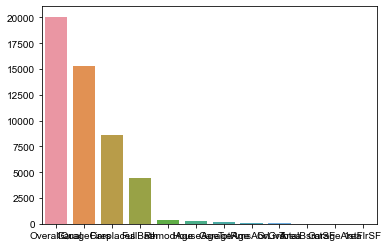

In [112]:
sns.barplot(data=coef_df)
sns.set(rc={'figure.figsize':(40,30)})

OverallQual, GarageCars, Fireplaces, FullBath were the most relevant variables for this model.

#### 2. Does the month when the sale occurs have an effect on the sale price?
How well can we predict apartment prices based on the features available?

In [113]:
df['PriceSqft'] = df['SalePrice'] / df['GrLivArea']

In [114]:
PriceSqft_df = df.groupby(['YrSold', 'MoSold'])['PriceSqft'].mean()
PriceSqft_df

YrSold  MoSold
2006    1         129.990587
        2         112.585510
        3         119.811411
        4         112.613334
        5         119.495951
        6         116.647899
        7         120.743302
        8         123.806298
        9         124.449891
        10        116.711622
        11        125.481275
        12        127.715557
2007    1         114.175399
        2         113.460860
        3         110.051624
        4         121.355747
        5         122.949186
        6         123.815645
        7         124.512269
        8         117.047668
        9         112.437297
        10        129.371473
        11        119.399027
        12        138.827116
2008    1         126.300252
        2         125.205966
        3         119.013936
        4         120.787733
        5         125.898305
        6         119.593480
        7         116.953984
        8         125.707680
        9         105.180524
        10        126.809500

In [115]:
PriceSqft_df =PriceSqft_df.unstack(level='YrSold')

In [116]:
PriceSqft_df

YrSold,2006,2007,2008,2009,2010
MoSold,,,,,
1,129.990587,114.175399,126.300252,125.287603,104.873986
2,112.585510,113.460860,125.205966,122.908323,137.619476
3,119.811411,110.051624,119.013936,124.668299,127.459178
4,112.613334,121.355747,120.787733,119.076222,119.467373
5,119.495951,122.949186,125.898305,115.618014,123.225996
6,116.647899,123.815645,119.593480,119.589028,116.239515
7,120.743302,124.512269,116.953984,121.517770,95.419972
8,123.806298,117.047668,125.707680,114.753587,NaN
9,124.449891,112.437297,105.180524,134.303314,NaN


In [117]:
PriceSqft_df.mean(axis=1)

MoSold
1     120.125565
2     122.356027
3     120.200889
4     118.660082
5     121.437490
6     119.177113
7     115.829459
8     120.328808
9     119.092756
10    123.400740
11    120.505319
12    124.493165
dtype: float64

In [118]:
PriceSqft_df.median(axis=1)

MoSold
1     125.287603
2     122.908323
3     119.811411
4     119.467373
5     122.949186
6     119.589028
7     120.743302
8     120.426983
9     118.443594
10    123.759932
11    122.440151
12    124.363337
dtype: float64

By looking at the data it seems the last and first months of each year are the best months to sell a house, but since we only have a few years of data, this is only Anecdotal evidence. It would be interesting to try to aggregate GDP data to see what is the correlation between Price per Square Foot and GDP.

#### 3. How well can we predict apartment prices based on the features available?

In [119]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 1436854811.29
Coefficient of determination: 0.76


Even though we used a simple model, a 0,76 R^2 is still relevant and could be used to inform us of predicted house prices